## Notebook to produce Figure 3 for for Chiacchierini et al. (2021)

![Figure 3](./figs/PPP_figs_R2_Fig3.png "Figure 3")

In [1]:
import sys
sys.path.append('..\\helperfx')

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.lines as mlines
import matplotlib.transforms as transforms

import dabest as db
import pandas as pd
import trompy as tp
import numpy as np
import dill
from scipy.stats import ttest_ind

from settings4figs import *
from fx4figs import *

%matplotlib inline

In [2]:
#Adds control column for calculating vs. 50%
con = [0.5] * 15
df_behav.insert(0, "control", con)

#Initializes details for saving statistics
stats_args = {}
stats_args["file"] = "..\\stats\\estimation_stats.xlsx"
stats_args["file"] = "" # Comment this line out to write a new stats file

# with pd.ExcelWriter(stats_args["file"]) as writer:
#     df_behav["control"].to_excel(writer, sheet_name="front")

### Panel A - representative color plots

C:\Github\PPP_analysis\helperfx\fx4figs.py:38: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mesh = ax.pcolormesh(xx, yy, data, cmap=heatmap_color_scheme, shading = 'flat')
C:\Github\PPP_analysis\helperfx\fx4figs.py:38: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mesh = ax.pcolormesh(xx, yy, data, cmap=heatmap_color_scheme, shading = 'flat')


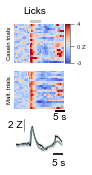

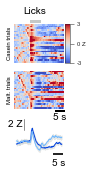

In [3]:
fig3A = heatmap_panel(df_heatmap, "NR")

fig3B = heatmap_panel(df_heatmap, "PR")

### Panel B - average photometry signal

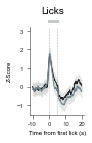

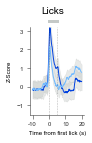

In [4]:
keys = ['pref1_cas_licks_forced', 'pref1_malt_licks_forced']

fig3B = photogroup_panel(df_photo, keys, "NR", colorgroup="control")
fig3B = photogroup_panel(df_photo, keys, "PR", colorgroup="expt")

### Panel C - AUC comparison

No stats file to write to.


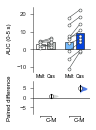

In [5]:
keys =  ['pref1_auc_malt', 'pref1_auc_cas']
stats_args["sheet"] = "pref1_auc"
data, df = prep4estimationstats(df_photo, ["NR", "PR"], keys)
fig3C = barscatter_plus_estimation(data, df, ylabel="AUC (0-5 s)", stats_args=stats_args)

### Panel D - Late AUC comparison

No stats file to write to.


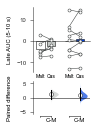

In [6]:
keys =  ['pref1_lateauc_malt', 'pref1_lateauc_cas']
stats_args["sheet"] = "pref1_lateauc"
data, df = prep4estimationstats(df_photo, ["NR", "PR"], keys)
fig3D = barscatter_plus_estimation(data, df, ylabel="Late AUC (5-10 s)", stats_args=stats_args)

### Panel E - Late AUC comparison

Could not space all sets of points.
Could not space all sets of points.
Comparison of baseline, NR vs. PR: t=[-0.30027598], p=[0.76871458]


C:\ProgramData\Anaconda3\envs\ppp\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


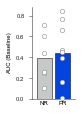

In [7]:
### Reads in data
pickle_in = open('..\\data\\ppp_dfs_startAUC.pickle', 'rb')
df_NR_startAUC, df_PR_startAUC = pd.read_pickle(pickle_in, compression=None)

fig3E, ax = plt.subplots(figsize=(1.1,1.6))
fig3E.subplots_adjust(left=0.35, bottom=0.15)
_, barx, _, _ = tp.barscatter([df_NR_startAUC, df_PR_startAUC],
              barfacecolor=[col["nr_cas"], col["pr_cas"]],
              barfacecoloroption="individual",
              scattersize=20,
              spaced=True,
              ax=ax)

ax.set_ylabel("AUC (Baseline)")

ax.set_xlim([0.3,2.7])

barlabels = ["NR", "PR"]
for xval, label in zip(barx, barlabels):
    ax.text(xval, -.02, label, ha="center", va="top", fontsize=6)

stats = ttest_ind(df_NR_startAUC, df_PR_startAUC)
print("Comparison of baseline, NR vs. PR: t={}, p={}".format(stats[0], stats[1]))